# Geoparsing using Nominatim 

Raechel A. Portelli
Updated: May 17, 2021

This tutorial uses Noinatim to identify toponyms from The Call of the Wild by Jack London. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gpd

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes

In [31]:
#read in a txt from Project Gutenberg
url = "https://www.gutenberg.org/files/215/215-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')

<class 'str'>, 
198823, 
﻿
The Project Gutenberg EBook of The Call of the Wild, by Jack London

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located befo


In [32]:
#extract Geographic Names
places = GeoText(raw)
cities = list(places.cities)
cities

['Linda',
 'Man',
 'San',
 'Santa Clara',
 'Alice',
 'College Park',
 'Frisco',
 'San Francisco',
 'Seattle',
 'Of',
 'Seattle',
 'Of',
 'Yukon',
 'Police',
 'Best',
 'Santa Clara',
 'Yukon',
 'Yukon',
 'Mercedes',
 'Mercedes',
 'Mercedes',
 'Mercedes',
 'Plum',
 'Mercedes',
 'Mercedes',
 'Pullman',
 'Mercedes',
 'Mercedes',
 'Mercedes',
 'Mercedes',
 'Mercedes',
 'Yukon',
 'Mercedes',
 'Mercedes',
 'Mercedes',
 'White River',
 'Mercedes',
 'Thornton',
 'White River',
 'Thornton',
 'Thornton',
 'Mercedes',
 'Thornton',
 'Mercedes',
 'Thornton',
 'Mercedes',
 'Thornton',
 'Mercedes',
 'Man',
 'Thornton',
 'Thornton',
 'Thornton',
 'Santa Clara',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Burton',
 'Thornton',
 'Burton',
 'Thornton',
 'Burton',
 'Manila',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Thornton',
 'Th

In [33]:
geolocator = Nominatim(user_agent='rawhiteph@gmail.com')

lat_lon = []
for city in cities: 
    try:
        location = geolocator.geocode(city)
        if location:
            print(location.latitude, location.longitude)
            lat_lon.append(location)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s"%
             (city, e))
lat_lon

44.8371855 0.7387986
54.1936805 -4.5591148
36.638392 127.6961188
37.2333253 -121.6846349
27.7522487 -98.0697249
38.980666 -76.9369189
33.1506744 -96.8236116
37.7790262 -122.419906
47.6038321 -122.3300624
40.881735899999995 40.27544376928809
47.6038321 -122.3300624
40.881735899999995 40.27544376928809
63.000147 -136.002502
53.5486435 14.5657399
51.510017 5.398661990056466
37.2333253 -121.6846349
63.000147 -136.002502
63.000147 -136.002502
-24.4504957 -54.1647255
-24.4504957 -54.1647255
-24.4504957 -54.1647255
-24.4504957 -54.1647255
40.5003457 -79.7494911
-24.4504957 -54.1647255
-24.4504957 -54.1647255
46.7304268 -117.173895
-24.4504957 -54.1647255
-24.4504957 -54.1647255
-24.4504957 -54.1647255
-24.4504957 -54.1647255
-24.4504957 -54.1647255
63.000147 -136.002502
-24.4504957 -54.1647255
-24.4504957 -54.1647255
-24.4504957 -54.1647255
43.8198998 -72.6045818
-24.4504957 -54.1647255
39.8695516 -104.985181
43.8198998 -72.6045818
39.8695516 -104.985181
39.8695516 -104.985181
-24.4504957 -54

[Location(Lalinde, Bergerac, Dordogne, Nouvelle-Aquitaine, France métropolitaine, 24150, France, (44.8371855, 0.7387986, 0.0)),
 Location(Isle of Man, (54.1936805, -4.5591148, 0.0)),
 Location(대한민국, (36.638392, 127.6961188, 0.0)),
 Location(Santa Clara County, California, United States, (37.2333253, -121.6846349, 0.0)),
 Location(Alice, Jim Wells County, Texas, United States, (27.7522487, -98.0697249, 0.0)),
 Location(College Park, Prince George's County, Maryland, United States, (38.980666, -76.9369189, 0.0)),
 Location(Frisco, Collin County, Texas, United States, (33.1506744, -96.8236116, 0.0)),
 Location(San Francisco, San Francisco City and County, San Francisco, California, United States, (37.7790262, -122.419906, 0.0)),
 Location(Seattle, King County, Washington, United States, (47.6038321, -122.3300624, 0.0)),
 Location(Of, Trabzon, Karadeniz Bölgesi, 61830, Türkiye, (40.881735899999995, 40.27544376928809, 0.0)),
 Location(Seattle, King County, Washington, United States, (47.603

In [36]:
#Create dataframe of city names and coordinates
latLongCity = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
latLongCity.head(5)

,City Name,Coordinates
0,"Lalinde, Bergerac, Dordogne, Nouvelle-Aquitain...","(44.8371855, 0.7387986)"
1,Isle of Man,"(54.1936805, -4.5591148)"
2,대한민국,"(36.638392, 127.6961188)"
3,"Santa Clara County, California, United States","(37.2333253, -121.6846349)"
4,"Alice, Jim Wells County, Texas, United States","(27.7522487, -98.0697249)"


In [37]:
#convert data frame info into point geometry
geometry = [Point(x[1], x[0]) for x in latLongCity['Coordinates']]
geometry[:7]

In [38]:
## coordinate system I'm using
crs = {'init': 'epsg:4326'}

## convert df to geo df
geo_df = gpd.GeoDataFrame(latLongCity, crs=crs, geometry=geometry)
geo_df.head()

,City Name,Coordinates,geometry
0,"Lalinde, Bergerac, Dordogne, Nouvelle-Aquitain...","(44.8371855, 0.7387986)",POINT (0.73880 44.83719)
1,Isle of Man,"(54.1936805, -4.5591148)",POINT (-4.55911 54.19368)
2,대한민국,"(36.638392, 127.6961188)",POINT (127.69612 36.63839)
3,"Santa Clara County, California, United States","(37.2333253, -121.6846349)",POINT (-121.68463 37.23333)
4,"Alice, Jim Wells County, Texas, United States","(27.7522487, -98.0697249)",POINT (-98.06972 27.75225)


<AxesSubplot:>

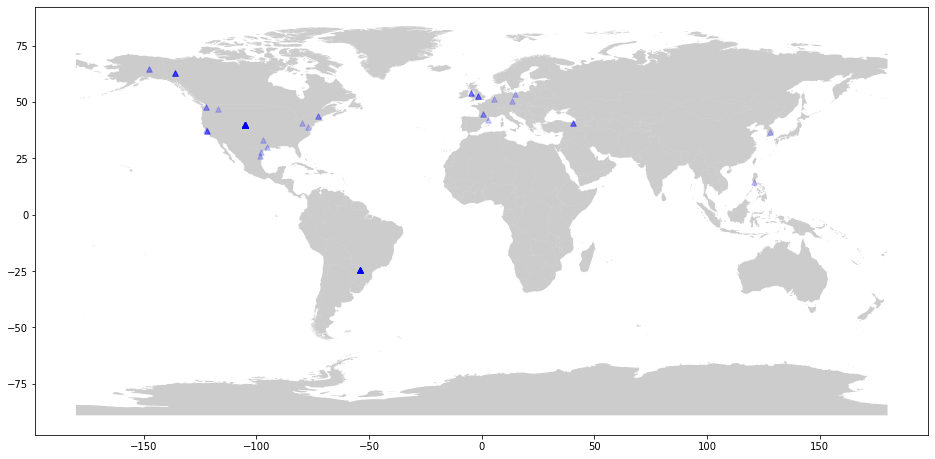

In [39]:
#Map points. Transparency is used to show intensity of distribution
## world map .shp file I downloaded
countries_map =gpd.read_file('World_Countries__Generalized_.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, 
                        color = 'b', marker = '^', alpha=.2)